# Estimating *$\pi$* using the Monte Carlo Method

---
| Explanation |    |
|:-----------|:-------:|
|Assume we have a circle of radius *r*. This circle can be inscribed inside a square of width *2r*. Pi can then be estimated by randomly selecting an *x* and *y* point inside the square and looking at the number of points that land inside and outside the circle <br><br> $Area_c = \pi r^2$ <br> $Area_s = (2r)^2 = 4r^2$ <br> $\frac{Area_c}{Area_s} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}$ <br> $\pi ≈ \frac{4 Area_c}{Area_s}$ <br><br> This means that computing the ratio of the areas and multiplying by 4 should approximate $\pi$ |![circle_in_square](https://www.101computing.net/wp/wp-content/uploads/estimating-pi-monte-carlo-method.png)|




In [9]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display
%matplotlib notebook

Points inside circle: 78644
Points outside circle: 21356
Estimate for Pi: 3.14576


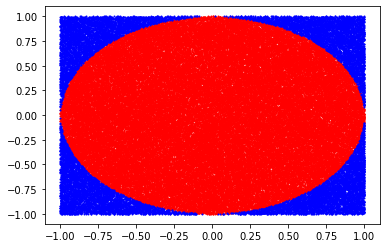

In [2]:
NUMBER_OF_SAMPLES = 10**5
REDRAW_EVERY_X = NUMBER_OF_SAMPLES/10

inside_circle, outside_circle = [], []
fig, ax = plt.subplots()

def plot_animate():
    ax.clear()
    _inside_points = np.array(inside_circle)
    _outside_points = np.array(outside_circle)
    
    _inside_x = 0 if len(_inside_points) == 0 else _inside_points[:,0]
    _inside_y = 0 if len(_inside_points) == 0 else _inside_points[:,1]
    _outside_x = 0 if len(_outside_points) == 0 else _outside_points[:,0]
    _outside_y = 0 if len(_outside_points) == 0 else _outside_points[:,1]
    
    ax.plot(_inside_x, _inside_y, marker='o', markersize=1, color='r',linestyle = 'None')
    ax.plot(_outside_x, _outside_y, marker='o', markersize=1, color='b',linestyle = 'None')
    
    fig.canvas.draw()

# Will loop through randomly genarated x and y points centered at zero
# ranging from -1 to 1. Distance will be calculated and x and y points
# added to a list for plotting
for i in range(NUMBER_OF_SAMPLES):
    x = -1 + 2*random.random()
    y = -1 + 2*random.random()
    r = math.sqrt(x**2 + y**2)
    inside_circle.append([x,y]) if (r<1) else outside_circle.append([x,y])
    if not (i % REDRAW_EVERY_X): plot_animate()
    
    

_inside, _outside = len(inside_circle), len(outside_circle)
print("Points inside circle: {}".format(_inside))   
print("Points outside circle: {}".format(_outside))
print("Estimate for Pi: {}".format(4*_inside/(_inside+_outside)))

### Calculate how good the approximation gets as the number of samples increases

IntProgress(value=1, max=10000, min=1)

Checking values up to 10000...
Done simulating. Plotting 9999 points...


<IPython.core.display.Javascript object>


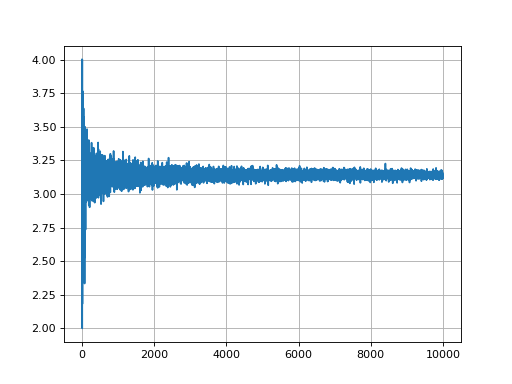

In [11]:
NUMBER_OF_SAMPLES = 10**4
pi_estimate = []

f = IntProgress(min=1, max=NUMBER_OF_SAMPLES)
display(f)
print("Checking values up to {}...".format(NUMBER_OF_SAMPLES))
for i in range(1, NUMBER_OF_SAMPLES):
    f.value += 1
    _estimate = 0
    inside_circle, outside_circle = 0, 0
    for j in range(i):
        x = -1 + 2*random.random()
        y = -1 + 2*random.random()
        r = math.sqrt(x**2 + y**2)
        if r<1:
            inside_circle += 1
        else:
            outside_circle+= 1
    _estimate = 4*inside_circle/(inside_circle+outside_circle)
    pi_estimate.append(_estimate)

print("Done simulating. Plotting {} points...".format(len(pi_estimate)))
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(pi_estimate)